In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

Some jobs fail. As far as I can determine, this is due to lacking any data in contigs, which should primarily happen for small contigs/when the species is greatly diverged from the reference. Below is a comprehensive check of the proportion lost contigs relative to the overall number of contigs.

In [2]:
vasili_stats = "~/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/plots/SupTable_Sample_Stats_wGT_QC.tsv"
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

In [3]:
vasili_table = pd.read_csv(vasili_stats, sep="\t")
sub_vasili = vasili_table.loc[(vasili_table.finalQC != "fail")
                              & (vasili_table.cov_chrA >= 20)
                              & (vasili_table.remove_as_relative != True)
                              & (vasili_table.remove_manual != True)
                              & (~vasili_table.ID.str.startswith("SAMEA11633"))
                             ]

s_l, t_l, f_l, tx_l, fx_l = [], [], [], [], []
for species in sub_vasili.species_genotyping.unique()[:]:
    species_inds = sub_vasili.loc[sub_vasili.species_genotyping == species]
    short_form = species.split("_")[0]
    regions_df = pd.read_csv(metadata_path+"{}_regions_and_batches.txt".format(short_form), sep="\t")
    all_paths_zarr = glob.glob("../zarr_20x_inds/{}/*/".format(species))
    all_paths_fail = glob.glob("../zarr_20x_inds/{}/*temp.bcf".format(species))
    zarr_chr = [x.split("/")[-2] for x in all_paths_zarr]
    fail_chr = [x.split("/")[-1].split("_temp")[0] for x in all_paths_fail]
    print(species)
    passing_df = regions_df.loc[regions_df.CONTIG_ID.isin(zarr_chr)]
    failing_df = regions_df.loc[regions_df.CONTIG_ID.isin(fail_chr)]
    #print("Total pass:", passing_df.END.sum(),
    #     "\n Percentage fail:", failing_df.END.sum()/passing_df.END.sum())
    #print("Total pass chrX:", passing_df.loc[(passing_df.MALE_PLOIDY == 1) &
    #                                   (passing_df.FEMALE_PLOIDY == 2)].END.sum(),
    #     "\n Percentage fail chrX:", failing_df.loc[(failing_df.MALE_PLOIDY == 1) &
    #                                   (failing_df.FEMALE_PLOIDY == 2)].END.sum()/passing_df.END.sum())
    s_l.append(species)
    t_l.append(passing_df.END.sum()), f_l.append(failing_df.END.sum())
    tx_l.append(passing_df.loc[(passing_df.MALE_PLOIDY == 1) & (passing_df.FEMALE_PLOIDY == 2)].END.sum())
    fx_l.append(failing_df.loc[(failing_df.MALE_PLOIDY == 1) & (failing_df.FEMALE_PLOIDY == 2)].END.sum())
    
pass_fail_df = pd.DataFrame({"species": s_l, "total_pass": t_l, "total_fail": f_l,
                         "total_pass_chrx": tx_l, "total_fail_chrx": fx_l})
pass_fail_df["total_fail_proportion"] = pass_fail_df.total_fail/pass_fail_df.total_pass

Allenopithecus_nigroviridis_ssp
Aotus_azarai_ssp
Aotus_griseimembra_ssp
Aotus_nancymaae_ssp
Aotus_trivirgatus_ssp
Aotus_vociferans_ssp
Alouatta_belzebul_ssp
Alouatta_caraya_ssp
Alouatta_discolor_ssp
Alouatta_juara_ssp
Alouatta_macconnelli_ssp
Alouatta_palliata_ssp
Alouatta_seniculus_ssp
Ateles_belzebuth_ssp
Ateles_chamek_ssp
Ateles_geoffroyi_ssp
Ateles_marginatus_ssp
Ateles_paniscus_ssp
Brachyteles_hypoxanthus_ssp
Lagothrix_lagotricha_ssp
Callimico_goeldii_ssp
Callithrix_geoffroyi_ssp
Callithrix_jacchus_ssp
Callithrix_kuhlii_ssp
Cebuella_niveiventris_ssp
Cebuella_pygmaea_ssp
Mico_argentatus_ssp
Mico_humeralifer_ssp
Mico_humilis_ssp
Carlito_syrichta_ssp
Cephalopachus_bancanus_ssp
Tarsius_dentatus_ssp
Tarsius_lariang_ssp
Tarsius_wallacei_ssp
Cercopithecus_ascanius_ssp
Cercopithecus_campbelli_ssp
Cercopithecus_cephus_ssp
Cercopithecus_denti_ssp
Cercopithecus_diana_ssp
Cercopithecus_hamlyni_ssp
Cercopithecus_mitis_ssp
Cercopithecus_mona_ssp
Cercopithecus_neglectus_ssp
Cercopithecus_nictita

In [4]:
pass_fail_df.sort_values("total_pass")[:11].species.to_list()

['Pithecia_vanzolinii_ssp',
 'Piliocolobus_gordonorum_ssp',
 'Piliocolobus_kirkii_ssp',
 'Piliocolobus_tephrosceles_ssp',
 'Cacajao_ayresi_ssp',
 'Cacajao_calvus_ssp',
 'Cacajao_hosomi_ssp',
 'Cacajao_melanocephalus_ssp',
 'Chiropotes_albinasus_ssp',
 'Chiropotes_israelita_ssp',
 'Chiropotes_sagulatus_ssp']

In [5]:
sub_vasili.loc[sub_vasili.species_genotyping.isin(pass_fail_df.sort_values("total_pass")[:11].species)]

,ID,ID_PGDP,group,family,genus,species,subspecies,species_full,species_short,species_genotyping,...,reason,finalQC,Kuderna_AB_QC,Kuderna_COV_QC,relatives,remove_as_relative,generation,founder,remove_manual,pedigree_source
2690,PD_0045,PD_0045,OWM,Cercopithecidae,Piliocolobus,gordonorum,ssp,Piliocolobus_gordonorum_ssp,P.gordonorum_ssp,Piliocolobus_gordonorum_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2691,PD_0046,PD_0046,OWM,Cercopithecidae,Piliocolobus,kirkii,ssp,Piliocolobus_kirkii_ssp,P.kirkii_ssp,Piliocolobus_kirkii_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2692,PD_0047,PD_0047,OWM,Cercopithecidae,Piliocolobus,tephrosceles,ssp,Piliocolobus_tephrosceles_ssp,P.tephrosceles_ssp,Piliocolobus_tephrosceles_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2693,PD_0019,PD_0019,PLA,Pitheciidae,Cacajao,ayresi,ssp,Cacajao_ayresi_ssp,C.ayresi_ssp,Cacajao_ayresi_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2694,PD_0022,PD_0022,PLA,Pitheciidae,Cacajao,ayresi,ssp,Cacajao_ayresi_ssp,C.ayresi_ssp,Cacajao_ayresi_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2695,PD_0131,PD_0131,PLA,Pitheciidae,Cacajao,ayresi,ssp,Cacajao_ayresi_ssp,C.ayresi_ssp,Cacajao_ayresi_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2696,PD_0024,PD_0024,PLA,Pitheciidae,Cacajao,calvus,calvus,Cacajao_calvus_calvus,C.calvus_calvus,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2697,PD_0023,PD_0023,PLA,Pitheciidae,Cacajao,calvus,novaesi,Cacajao_calvus_novaesi,C.calvus_novaesi,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2698,PD_0132,PD_0132,PLA,Pitheciidae,Cacajao,calvus,novaesi,Cacajao_calvus_novaesi,C.calvus_novaesi,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2699,PD_0130,PD_0130,PLA,Pitheciidae,Cacajao,calvus,rubicundus,Cacajao_calvus_rubicundus,C.calvus_rubicundus,Cacajao_calvus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pass_fail_df.sort_values("total_pass")[:20]

,species,total_pass,total_fail,total_pass_chrx,total_fail_chrx,total_fail_proportion
170,Pithecia_vanzolinii_ssp,0,0,0,0,NaN
155,Piliocolobus_gordonorum_ssp,0,0,0,0,NaN
156,Piliocolobus_kirkii_ssp,0,0,0,0,NaN
157,Piliocolobus_tephrosceles_ssp,0,0,0,0,NaN
158,Cacajao_ayresi_ssp,0,0,0,0,NaN
159,Cacajao_calvus_ssp,0,0,0,0,NaN
160,Cacajao_hosomi_ssp,0,0,0,0,NaN
161,Cacajao_melanocephalus_ssp,0,0,0,0,NaN
162,Chiropotes_albinasus_ssp,0,0,0,0,NaN
163,Chiropotes_israelita_ssp,0,0,0,0,NaN


In [7]:
pass_fail_df.sort_values("total_fail")[-20:]

,species,total_pass,total_fail,total_pass_chrx,total_fail_chrx,total_fail_proportion
74,Hoolock_leuconedys_ssp,0,0,0,0,NaN
75,Hylobates_abbotti_ssp,0,0,0,0,NaN
76,Hylobates_agilis_ssp,0,0,0,0,NaN
77,Hylobates_klossii_ssp,0,0,0,0,NaN
78,Hylobates_lar_ssp,0,0,0,0,NaN
8,Alouatta_discolor_ssp,0,0,0,0,NaN
80,Hylobates_muelleri_ssp,0,0,0,0,NaN
81,Hylobates_pileatus_ssp,0,0,0,0,NaN
82,Hapalemur_griseus_ssp,0,0,0,0,NaN
83,Hapalemur_meridionalis_ssp,0,0,0,0,NaN


In [8]:
pass_fail_df.sort_values("total_pass_chrx")[:10]

,species,total_pass,total_fail,total_pass_chrx,total_fail_chrx,total_fail_proportion
170,Pithecia_vanzolinii_ssp,0,0,0,0,NaN
155,Piliocolobus_gordonorum_ssp,0,0,0,0,NaN
156,Piliocolobus_kirkii_ssp,0,0,0,0,NaN
157,Piliocolobus_tephrosceles_ssp,0,0,0,0,NaN
158,Cacajao_ayresi_ssp,0,0,0,0,NaN
159,Cacajao_calvus_ssp,0,0,0,0,NaN
160,Cacajao_hosomi_ssp,0,0,0,0,NaN
161,Cacajao_melanocephalus_ssp,0,0,0,0,NaN
162,Chiropotes_albinasus_ssp,0,0,0,0,NaN
163,Chiropotes_israelita_ssp,0,0,0,0,NaN


Checking the distribution of heterozygosity/alternate homozygous.

In [9]:
output_df = pd.read_csv("../results/window_stats_20x_inds/Rhinopithecus_brelichi_ssp_10kb_het_hom.txt",
                        sep="\t")
output_df

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
0,0.0,0,0,SAMN03076574,0,NC_044565.1,10000,0.0000,aut,Rhinopithecus_brelichi_ssp
1,0.0,18,18,SAMN03076574,10000,NC_044565.1,20000,0.5729,aut,Rhinopithecus_brelichi_ssp
2,0.0,18,18,SAMN03076574,20000,NC_044565.1,30000,0.9726,aut,Rhinopithecus_brelichi_ssp
3,0.0,18,18,SAMN03076574,30000,NC_044565.1,40000,0.9544,aut,Rhinopithecus_brelichi_ssp
4,0.0,19,21,SAMN03076574,40000,NC_044565.1,50000,0.9174,aut,Rhinopithecus_brelichi_ssp
...,...,...,...,...,...,...,...,...,...,...
294664,5.0,10,31,SAMN03076574,134980000,NC_044561.1,134990000,0.6858,aut,Rhinopithecus_brelichi_ssp
294665,33.0,16,68,SAMN03076574,134990000,NC_044561.1,135000000,0.8769,aut,Rhinopithecus_brelichi_ssp
294666,9.0,22,55,SAMN03076574,135000000,NC_044561.1,135010000,0.9911,aut,Rhinopithecus_brelichi_ssp
294667,2.0,69,76,SAMN03076574,135010000,NC_044561.1,135020000,0.9901,aut,Rhinopithecus_brelichi_ssp


<Axes: xlabel='alt_hom', ylabel='het'>

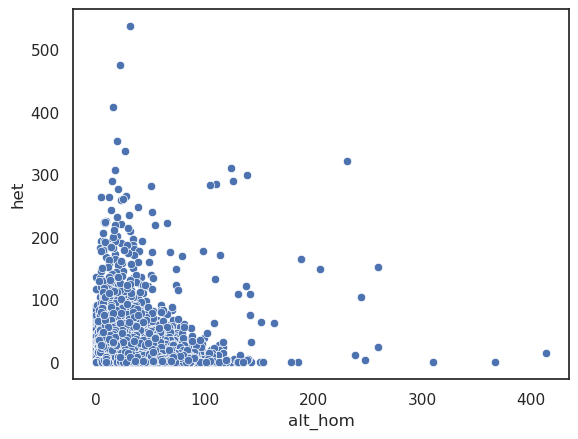

In [10]:
sns.scatterplot(output_df, y="het", x="alt_hom")

<Axes: xlabel='alt_hom', ylabel='het'>

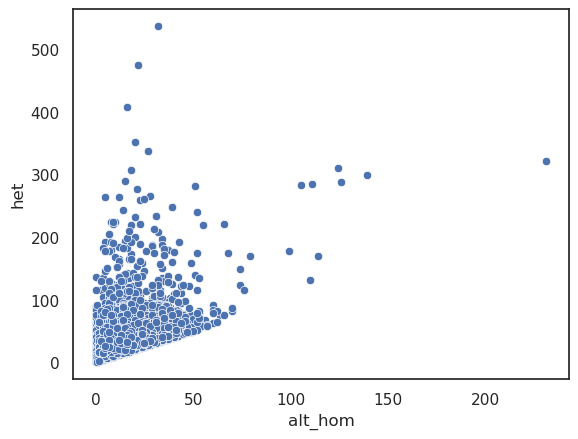

In [11]:
sns.scatterplot(output_df.loc[output_df.het > output_df.alt_hom], y="het", x="alt_hom")

In [12]:
len(output_df.loc[output_df.het > output_df.alt_hom])/(len(output_df))

0.15516732333567496

In [13]:
output_df.loc[(output_df.het > output_df.alt_hom*2+10) & (output_df.callable_frac >= 0.9)]

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
150,51.0,14,73,SAMN03076574,1500000,NC_044565.1,1510000,0.9837,aut,Rhinopithecus_brelichi_ssp
185,65.0,26,112,SAMN03076574,1850000,NC_044565.1,1860000,0.9881,aut,Rhinopithecus_brelichi_ssp
186,60.0,15,84,SAMN03076574,1860000,NC_044565.1,1870000,0.9540,aut,Rhinopithecus_brelichi_ssp
188,23.0,2,91,SAMN03076574,1880000,NC_044565.1,1890000,0.9980,aut,Rhinopithecus_brelichi_ssp
200,23.0,5,33,SAMN03076574,2000000,NC_044565.1,2010000,0.9944,aut,Rhinopithecus_brelichi_ssp
...,...,...,...,...,...,...,...,...,...,...
294625,26.0,7,34,SAMN03076574,134590000,NC_044561.1,134600000,0.9601,aut,Rhinopithecus_brelichi_ssp
294644,76.0,8,88,SAMN03076574,134780000,NC_044561.1,134790000,0.9171,aut,Rhinopithecus_brelichi_ssp
294645,151.0,6,223,SAMN03076574,134790000,NC_044561.1,134800000,0.9824,aut,Rhinopithecus_brelichi_ssp
294654,49.0,7,56,SAMN03076574,134880000,NC_044561.1,134890000,0.9868,aut,Rhinopithecus_brelichi_ssp


In [14]:
from scipy.stats import binomtest
binomtest(115, n=215, p=0.5, alternative='greater')

BinomTestResult(k=115, n=215, alternative='greater', statistic=0.5348837209302325, pvalue=0.16985028376712127)

In [15]:
for df_path in glob.glob("../results/window_stats_20x_inds/*_10kb_het_hom.txt")[:10]:
    print(df_path)
    output_df = pd.read_csv(df_path, sep="\t")
    print(len(output_df), len(output_df)/len(output_df.GVCF_ID.unique()), output_df.GVCF_ID.unique())
    print("Percentage well covered:", len(output_df.loc[output_df.callable_frac > 0.75])/(len(output_df)+1))
    chrx_df = output_df.loc[output_df.chr_type == "chrX"]
    print("Percentage well covered chrX:",len(chrx_df.loc[chrx_df.callable_frac > 0.75])/(len(chrx_df)+1))
    print("ChrX percentage (usable):",
          len(chrx_df.loc[chrx_df.callable_frac > 0.75])/(len(output_df.loc[output_df.callable_frac > 0.75])))

../results/window_stats_20x_inds/Saimiri_cassiquiarensis_ssp_10kb_het_hom.txt
2354148 261572.0 ['PD_0353' 'PD_0354' 'PD_0355' 'PD_0356' 'PD_0357' 'PD_0358' 'PD_0359'
 'PD_0360' 'PD_0373']
Percentage well covered: 0.971185341284685
Percentage well covered chrX: 0.9430157898185154
ChrX percentage (usable): 0.05036313893754798
../results/window_stats_20x_inds/Propithecus_edwardsi_ssp_10kb_het_hom.txt
260030 260030.0 ['PD_0169']
Percentage well covered: 0.5984786429310351
Percentage well covered chrX: 0.6020303827052293
ChrX percentage (usable): 0.05296774898311946
../results/window_stats_20x_inds/Gorilla_gorilla_ssp_10kb_het_hom.txt
10085011 347759.0 ['SAMEA5204233' 'SAMEA5204234' 'SAMEA5204236' 'SAMEA5204238'
 'SAMN01920484' 'SAMN01920485' 'SAMN01920486' 'SAMN01920487'
 'SAMN01920488' 'SAMN12714420' 'SAMN12714421' 'SAMN35877944' 'PD_0180'
 'PD_0183' 'PD_0184' 'PD_0186' 'PD_0187' 'PD_0188' 'PD_0190' 'PD_0191'
 'PD_0192' 'PD_0193' 'PD_0194' 'PD_0195' 'PD_0196' 'PD_0197' 'PD_0198'
 'PD_0260

In [16]:
female_list = sub_vasili.loc[sub_vasili.gSEX == "F"].ID
female_list

2         SAMN15801446
5              PD_0800
8              PD_0807
9              PD_0808
11             PD_0810
             ...      
3223      SAMN09935393
3224      SAMN33960461
3227      SAMN33960464
3229    SAMEA112483311
3239      SAMN29758785
Name: ID, Length: 746, dtype: object

In [17]:
s_l, ind_t_l, t_l, x_l = [], [], [], []
pt_l, px_l = [], []
het_aut_l, het_x_l = [], []
high_het_aut_l, high_het_x_l, outlier_total_aut, outlier_total_x = [], [], [], []
for df_path in glob.glob("../results/window_stats_20x_inds/*_10kb_het_hom.txt")[:]:
    species = df_path.split("/")[-1].split("_10kb")[0]
    print(species)
    output_df = pd.read_csv(df_path, sep="\t")
    ind_count = len(output_df.GVCF_ID.unique())
    s_l.append(species)
    ind_t_l.append(ind_count)
    t_l.append(len(output_df)/ind_count)
    x_l.append(len(output_df.loc[output_df.chr_type == "chrX"])/ind_count)
    pt_l.append(len(output_df.loc[output_df.callable_frac >= 0.9])/ind_count)
    px_l.append(len(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "chrX")])/ind_count)
    het_aut_l.append(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "aut")].het.mean())
    female_chrx = output_df.loc[(output_df.chr_type == "chrX") &
                                (output_df.GVCF_ID.isin(female_list))]
    het_x_l.append(female_chrx.loc[(female_chrx.callable_frac >= 0.9) ].het.mean())
    high_het_aut_l.append(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "aut") &
                                       (output_df.het >= output_df.alt_hom+15)].het.mean())
    high_het_x_l.append(female_chrx.loc[(female_chrx.callable_frac >= 0.9) &
                                       (female_chrx.het >= female_chrx.alt_hom+15)].het.mean())
    outlier_total_aut.append(len(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "aut") &
                                       (output_df.het >= output_df.alt_hom+15)])/ind_count)
    outlier_total_x.append(len(female_chrx.loc[(female_chrx.callable_frac >= 0.9) &
                                       (female_chrx.het >= female_chrx.alt_hom+15)])/ind_count)
    
het_df = pd.DataFrame({"species": s_l, "sample_count": ind_t_l, "total_all": t_l, "total_x": x_l, "total_pass_all": pt_l,
                      "total_pass_x": px_l, "het_aut": het_aut_l, "het_x": het_x_l,
                      "outlier_aut": high_het_aut_l, "outlier_x": high_het_x_l,
                       "outlier_total_aut": outlier_total_aut, "outlier_total_x": outlier_total_x})

Saimiri_cassiquiarensis_ssp
Propithecus_edwardsi_ssp
Gorilla_gorilla_ssp
Mico_argentatus_ssp
Semnopithecus_priam_ssp
Cercocebus_chrysogaster_ssp
Macaca_maura_ssp
Brachyteles_hypoxanthus_ssp
Propithecus_coquereli_ssp
Avahi_laniger_ssp
Cacajao_ayresi_ssp
Cercopithecus_mitis_ssp
Plecturocebus_caligatus_ssp
Aotus_azarai_ssp
Cercopithecus_wolfi_ssp
Saguinus_midas_ssp
Cheracebus_lucifer_ssp
Cheracebus_lugens_ssp
Mico_humilis_ssp
Varecia_variegata_ssp
Cheirogaleus_major_ssp
Otolemur_garnettii_ssp
Macaca_thibetana_ssp
Rhinopithecus_avunculus_ssp
Trachypithecus_cristatus_ssp
Saguinus_bicolor_ssp
Tarsius_lariang_ssp
Alouatta_caraya_ssp
Lagothrix_lagotricha_ssp
Cacajao_calvus_ssp
Macaca_nigrescens_ssp
Piliocolobus_gordonorum_ssp
Pongo_tapanuliensis_ssp
Eulemur_collaris_ssp
Aotus_griseimembra_ssp
Cebus_olivaceus_ssp
Prolemur_simus_ssp
Papio_hamadryas_ssp
Pithecia_hirsuta_ssp
Saguinus_geoffroyi_ssp
Cacajao_hosomi_ssp
Cercopithecus_ascanius_ssp
Mandrillus_leucophaeus_ssp
Trachypithecus_poliocephalus

In [18]:
female_chrx

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
256414,7.0,0,7,PD_0116,0,HiC_scaffold_24,10000,0.8613,chrX,Callimico_goeldii_ssp
256415,12.0,5,19,PD_0116,10000,HiC_scaffold_24,20000,0.8178,chrX,Callimico_goeldii_ssp
256416,38.0,4,49,PD_0116,20000,HiC_scaffold_24,30000,0.9692,chrX,Callimico_goeldii_ssp
256417,10.0,2,17,PD_0116,30000,HiC_scaffold_24,40000,0.9669,chrX,Callimico_goeldii_ssp
256418,15.0,0,15,PD_0116,40000,HiC_scaffold_24,50000,0.9256,chrX,Callimico_goeldii_ssp
...,...,...,...,...,...,...,...,...,...,...
281619,10.0,0,14,SAMN21582229,126000000,HiC_scaffold_24,126010000,0.9944,chrX,Callimico_goeldii_ssp
281620,13.0,0,16,SAMN21582229,126010000,HiC_scaffold_24,126020000,1.0000,chrX,Callimico_goeldii_ssp
281621,10.0,0,17,SAMN21582229,126020000,HiC_scaffold_24,126030000,0.9957,chrX,Callimico_goeldii_ssp
281622,11.0,0,22,SAMN21582229,126030000,HiC_scaffold_24,126040000,1.0000,chrX,Callimico_goeldii_ssp


In [19]:
het_df

,species,sample_count,total_all,total_x,total_pass_all,total_pass_x,het_aut,het_x,outlier_aut,outlier_x,outlier_total_aut,outlier_total_x
0,Saimiri_cassiquiarensis_ssp,9,261572.0,13567.0,243709.0,12156.0,11.876545,1.727912,54.035739,57.137931,8960.000000,6.444444
1,Propithecus_edwardsi_ssp,1,260030.0,13691.0,110247.0,5828.0,17.779303,5.589396,149.771513,135.500000,337.000000,4.000000
2,Gorilla_gorilla_ssp,29,347759.0,17755.0,270687.0,14022.0,17.863123,9.635890,33.780782,27.642694,94455.758621,2114.482759
3,Mico_argentatus_ssp,4,279967.0,14690.0,221239.0,10705.0,5.704012,1.400467,170.805589,250.000000,205.750000,0.250000
4,Semnopithecus_priam_ssp,1,279158.0,14456.0,225729.0,9182.0,16.807737,9.714223,65.398317,55.443439,9151.000000,221.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
246,Pongo_abelii_ssp,18,319041.0,16258.0,259778.0,13521.0,24.139954,14.583080,40.744912,33.223661,115906.500000,2594.944444
247,Cebus_unicolor_ssp,3,258545.0,13231.0,230211.0,11605.0,17.650366,9.099397,122.699071,113.000000,466.333333,3.333333
248,Trachypithecus_auratus_ssp,2,279167.0,14454.0,241595.0,9596.0,9.385191,NaN,48.054356,NaN,9585.000000,0.000000
249,Cercopithecus_pogonias_ssp,2,212750.0,12415.0,174495.0,9767.0,33.120259,NaN,98.913028,NaN,12883.500000,0.000000


<Axes: xlabel='total_pass_all', ylabel='total_pass_x'>

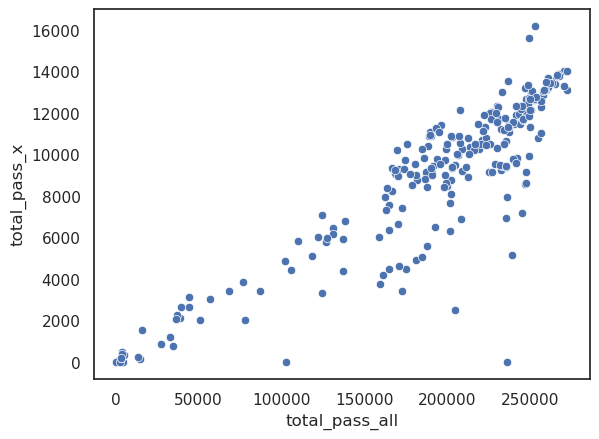

In [20]:
sns.scatterplot(het_df, x="total_pass_all", y="total_pass_x")

<Axes: xlabel='het_aut', ylabel='het_x'>

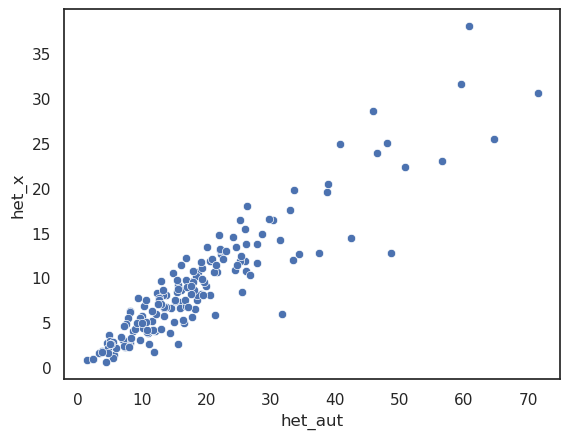

In [21]:
sns.scatterplot(het_df, x="het_aut", y="het_x")

<Axes: xlabel='outlier_aut', ylabel='outlier_x'>

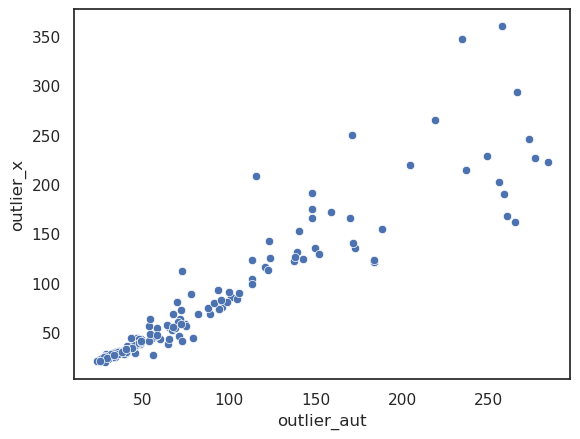

In [22]:
sns.scatterplot(het_df, x="outlier_aut", y="outlier_x")

<Axes: xlabel='outlier_total_aut', ylabel='outlier_total_x'>

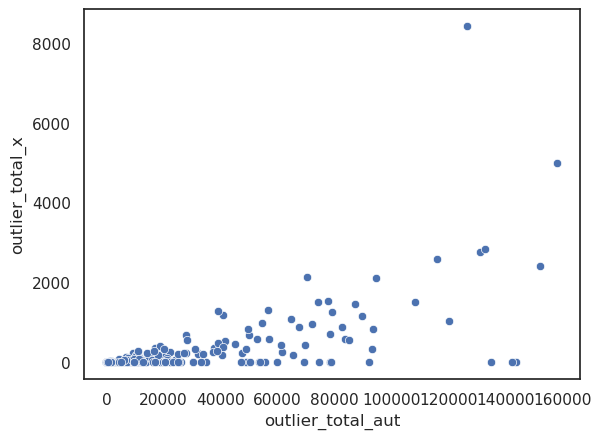

In [23]:
sns.scatterplot(het_df, x="outlier_total_aut", y="outlier_total_x")